# Diabetes Mellitus Prediction Using K-Nearest Neighbors (KNN)
This project aims to predict diabetes mellitus using the K-Nearest Neighbors algorithm, leveraging a dataset to train and evaluate our model's performance. We'll process the data, select features, train our model, and assess its accuracy in predicting diabetes outcomes.


In [1]:
!pip install mlxtend

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



C:\Users\racha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading the Dataset
We'll begin by loading the diabetes dataset into a Pandas DataFrame. This dataset contains several medical attributes and an outcome indicating whether or not the individual has diabetes.


In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('kaggle_diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.shape

(2000, 9)

In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
'''
- Pregnancies: More pregnancies might increase diabetes risk.
- Glucose: High blood sugar is a key sign of diabetes.
- Blood Pressure: High blood pressure can suggest diabetes risk.
- Skin Thickness: Thicker skin might hint at higher diabetes risk.
- Insulin: Low insulin can mean the body isn’t handling sugar well.
- BMI: Higher body fat can lead to higher diabetes risk.
- Diabetes Pedigree Function: Family history of diabetes can affect your risk.
- Age: Getting older increases the chance of getting diabetes.
- Outcome: Shows if someone has diabetes or not, based on the above factors.
'''

'\n- Pregnancies: More pregnancies might increase diabetes risk.\n- Glucose: High blood sugar is a key sign of diabetes.\n- Blood Pressure: High blood pressure can suggest diabetes risk.\n- Skin Thickness: Thicker skin might hint at higher diabetes risk.\n- Insulin: Low insulin can mean the body isn’t handling sugar well.\n- BMI: Higher body fat can lead to higher diabetes risk.\n- Diabetes Pedigree Function: Family history of diabetes can affect your risk.\n- Age: Getting older increases the chance of getting diabetes.\n- Outcome: Shows if someone has diabetes or not, based on the above factors.\n'

## Dataset Overview
Let's perform an initial inspection of our dataset to understand its structure, including the number of entries, missing values, and a basic statistical summary of the data.


In [5]:
# Display the shape of the dataset
print(f"The dataset contains {diabetes_data.shape[0]} rows and {diabetes_data.shape[1]} columns.")

# Check for missing values
missing_values = diabetes_data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Show basic statistical details
diabetes_data.describe()


The dataset contains 2000 rows and 9 columns.

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [6]:
diabetes_data.describe().T

count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.19300    8.149901   0.000  27.375   
DiabetesPedigreeFunction  2000.0    0.47093    0.323553   0.078   0.244   
Age                       2000.0   33.09050   11.786423  21.000  24.000   
Outcome                   2000.0    0.34200    0.474498   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    40.000  130.000  744.00  
BMI                        32.300   36.800   80.60  
DiabetesPedigreeFunction    0.376    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

## Data Preprocessing
Before training our model, we need to preprocess the data. This includes handling missing values, feature scaling, and splitting the data into training and testing sets. Feature scaling is crucial for KNN due to its reliance on distance calculations.


In [7]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
# Example: Replacing zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI with NaN
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns] = diabetes_data[columns].replace(0, np.NaN)

# Filling missing values with the mean of each column
diabetes_data.fillna(diabetes_data.mean(), inplace=True)


In [9]:
# Separating features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Data Visualization
Visualizing the dataset can provide insights into the distribution of features and the relationship between diabetes outcomes and other variables. We'll use histograms and correlation heatmaps to explore these relationships.


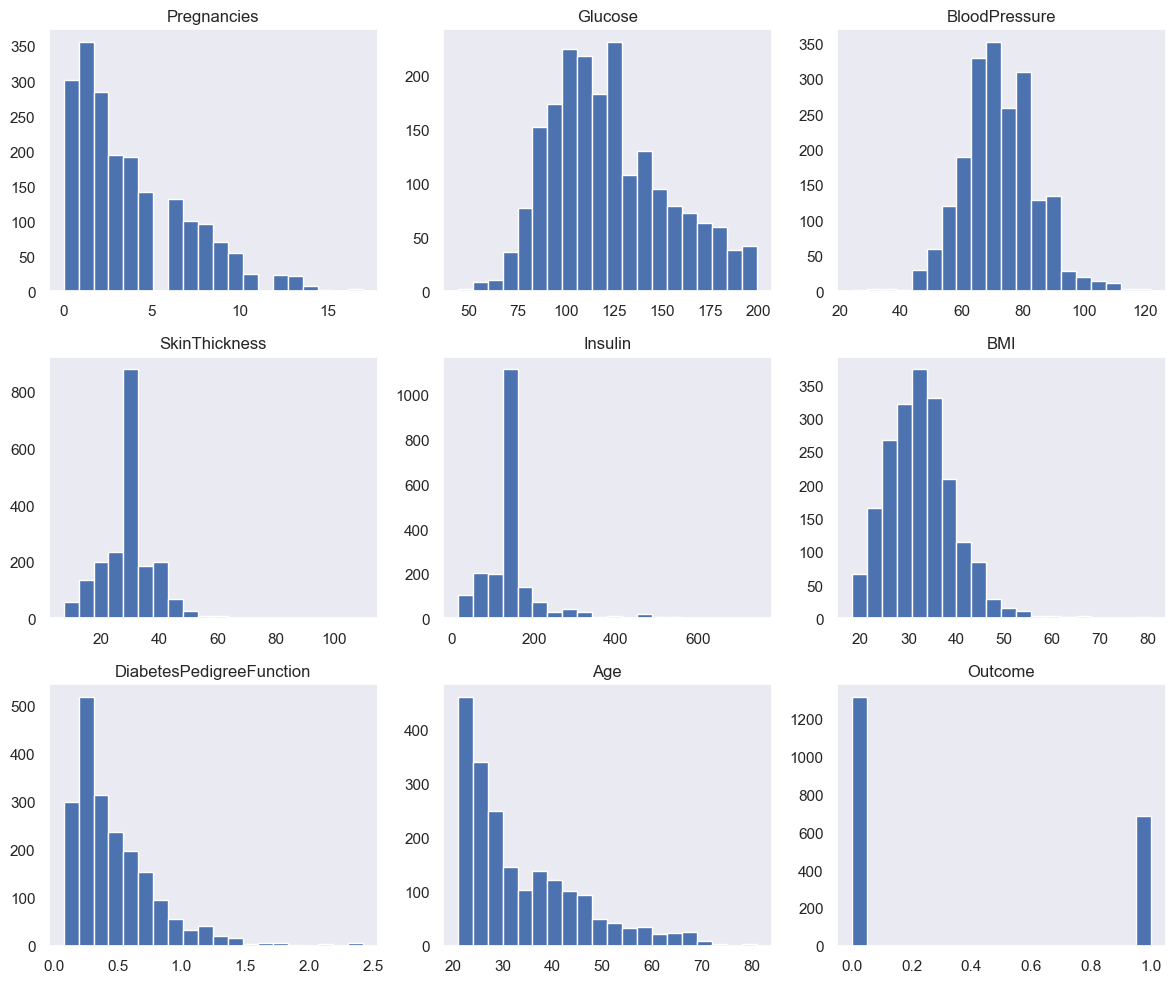

In [10]:
# Plot histograms for each feature
diabetes_data.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()


## Correlation Heatmap
A correlation heatmap can help identify how closely related different features are to each other and to the Outcome variable. This information is valuable for feature selection and understanding potential predictors of diabetes.


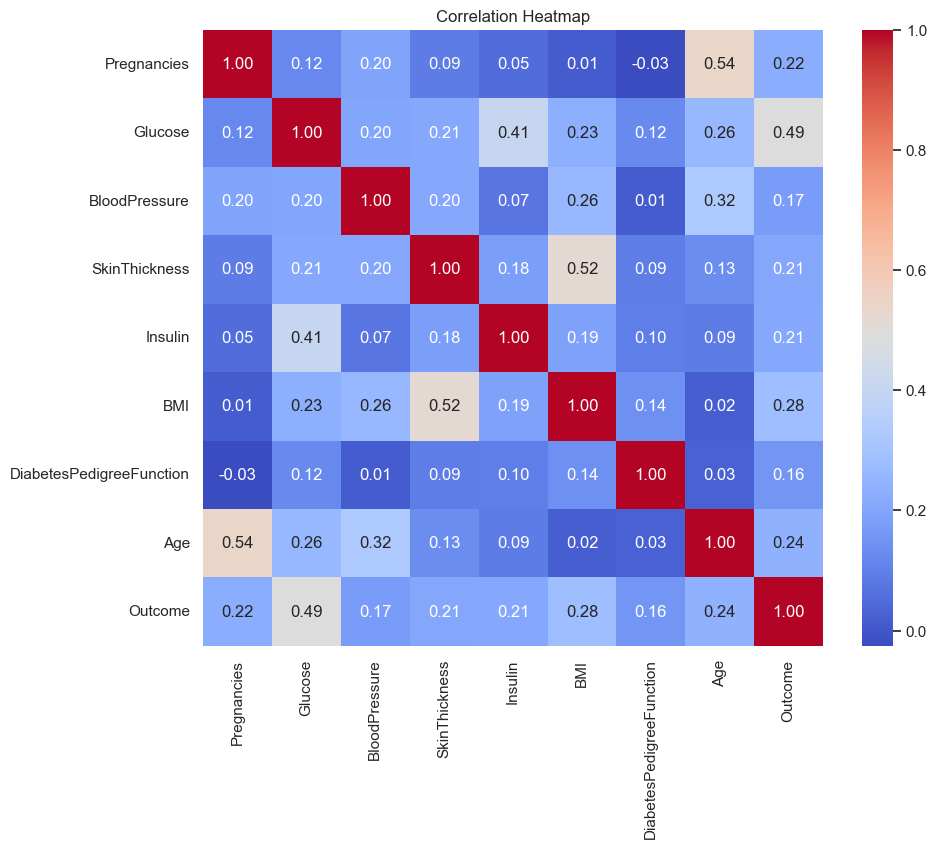

In [11]:
# Calculate correlations
corr_matrix = diabetes_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


## Pair Plot
A pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots can be very useful to quickly spot correlations, trends, and outliers among multiple features.


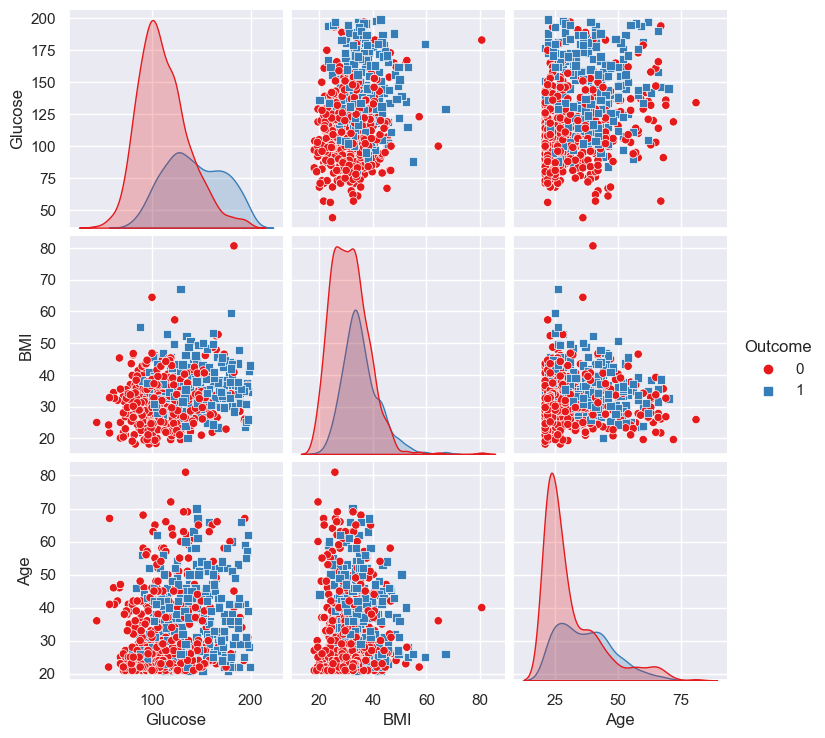

In [12]:
# Since the dataset might be large, it's a good idea to focus on a subset of features or use a sample of the data
selected_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(diabetes_data[selected_features], hue='Outcome', diag_kind='kde', markers=["o", "s"], palette='Set1')
plt.show()


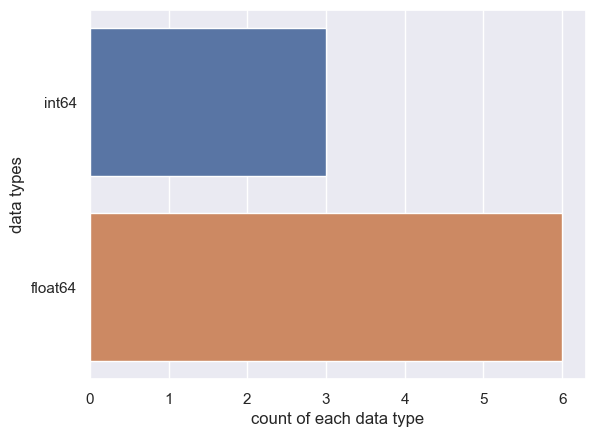

In [13]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Boxplots for Feature Comparison
Boxplots are useful for visualizing the distribution of numerical data and can highlight outliers. They provide a good way to compare different features relative to the diabetes outcome.


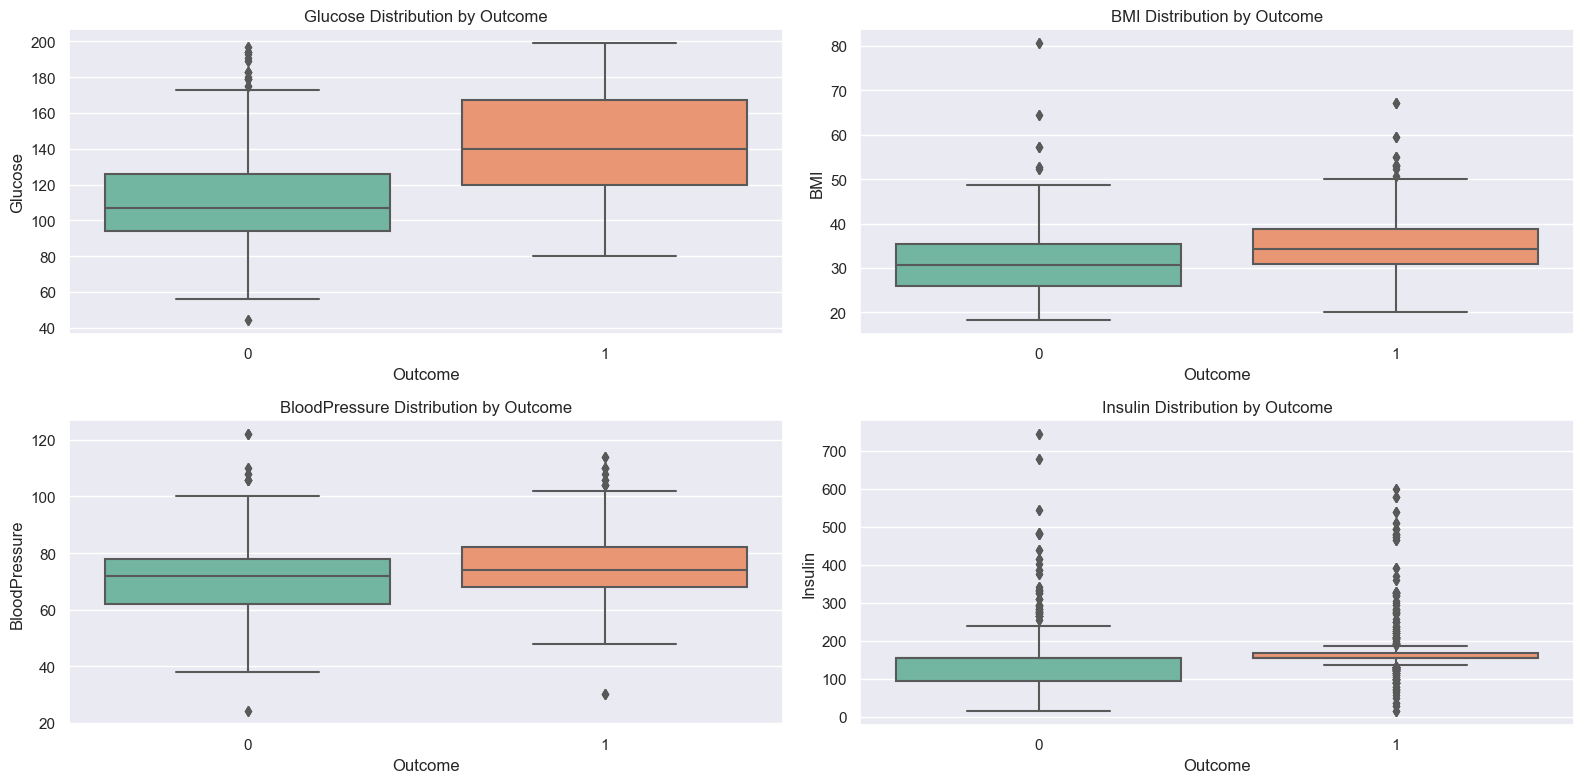

In [14]:
# Plotting boxplots for some key features against the Outcome
features_to_plot = ['Glucose', 'BMI', 'BloodPressure', 'Insulin']
n_cols = 2
n_rows = int(np.ceil(len(features_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Outcome', y=feature, data=diabetes_data, ax=axes[i//n_cols, i%n_cols], palette="Set2")
    axes[i//n_cols, i%n_cols].set_title(f'{feature} Distribution by Outcome')
plt.tight_layout()
plt.show()


## Violin Plots for Feature Distribution
Violin plots are similar to box plots, but they also include a rotated kernel density plot on each side. This provides a deeper view into the distribution of the data.


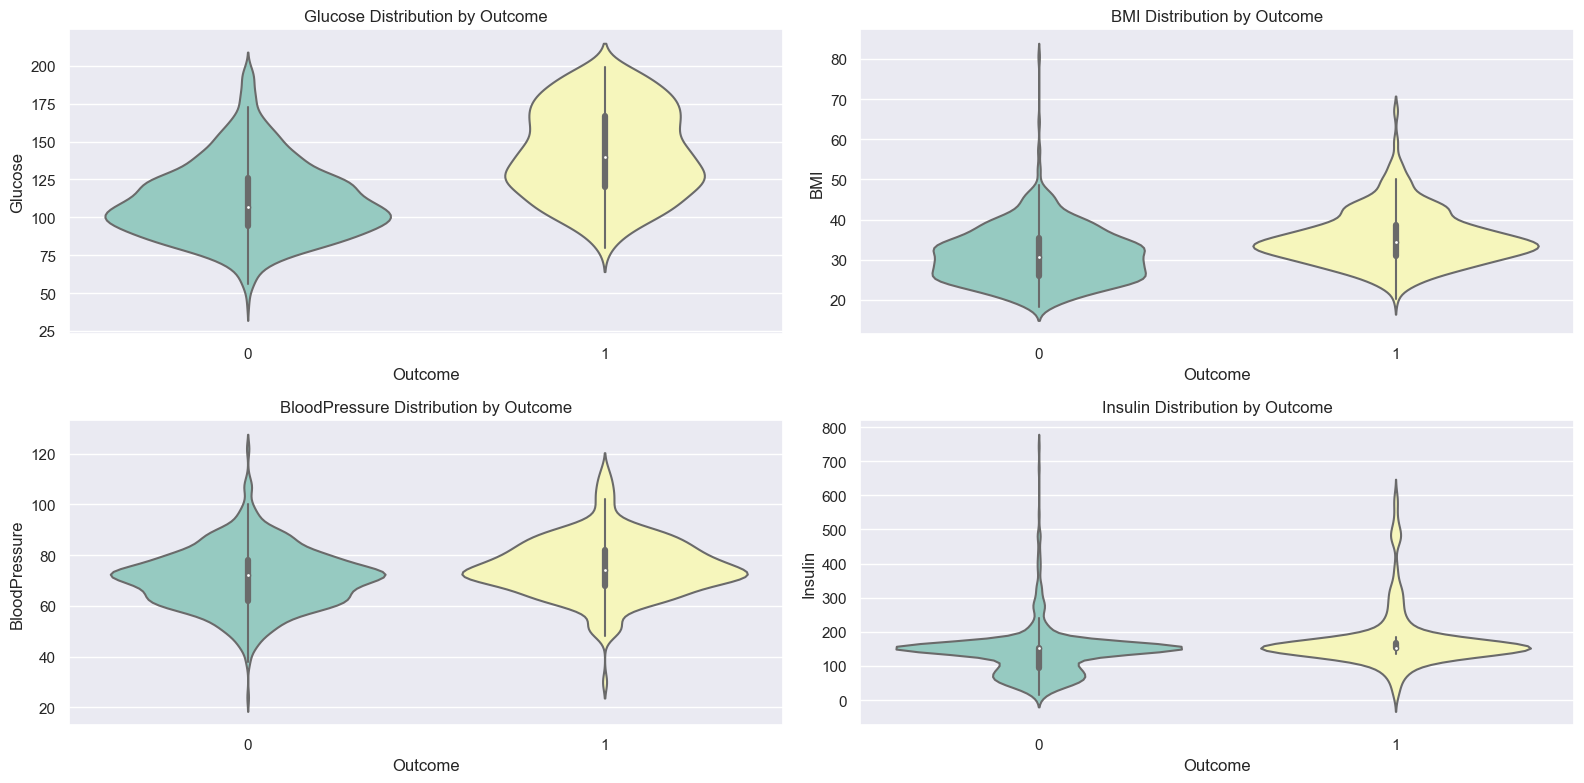

In [15]:
# Plotting violin plots for the same key features against the Outcome
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
for i, feature in enumerate(features_to_plot):
    sns.violinplot(x='Outcome', y=feature, data=diabetes_data, ax=axes[i//n_cols, i%n_cols], palette="Set3")
    axes[i//n_cols, i%n_cols].set_title(f'{feature} Distribution by Outcome')
plt.tight_layout()
plt.show()


## Scatter Plots with Fitted Lines
Scatter plots can help visualize the relationship between two numerical variables, with fitted lines to highlight any linear relationship between the variables and the Outcome.


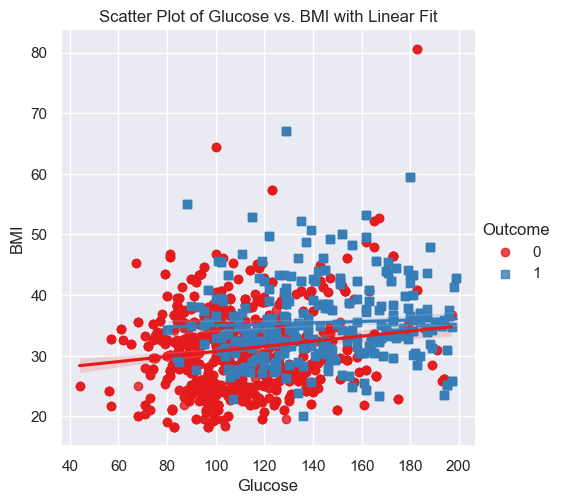

In [16]:
# Using seaborn's lmplot to create scatter plots with a linear fit
sns.lmplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_data, palette='Set1', markers=["o", "s"])
plt.title('Scatter Plot of Glucose vs. BMI with Linear Fit')
plt.show()


## Count Plot for Categorical Data
Count plots are useful for examining the distribution of categorical data. Let's look at the distribution of the Outcome variable to understand the balance of our dataset.


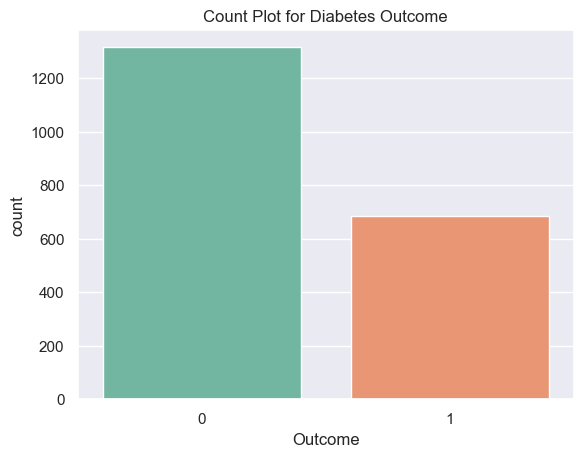

In [17]:
sns.countplot(x='Outcome', data=diabetes_data, palette='Set2')
plt.title('Count Plot for Diabetes Outcome')
plt.show()


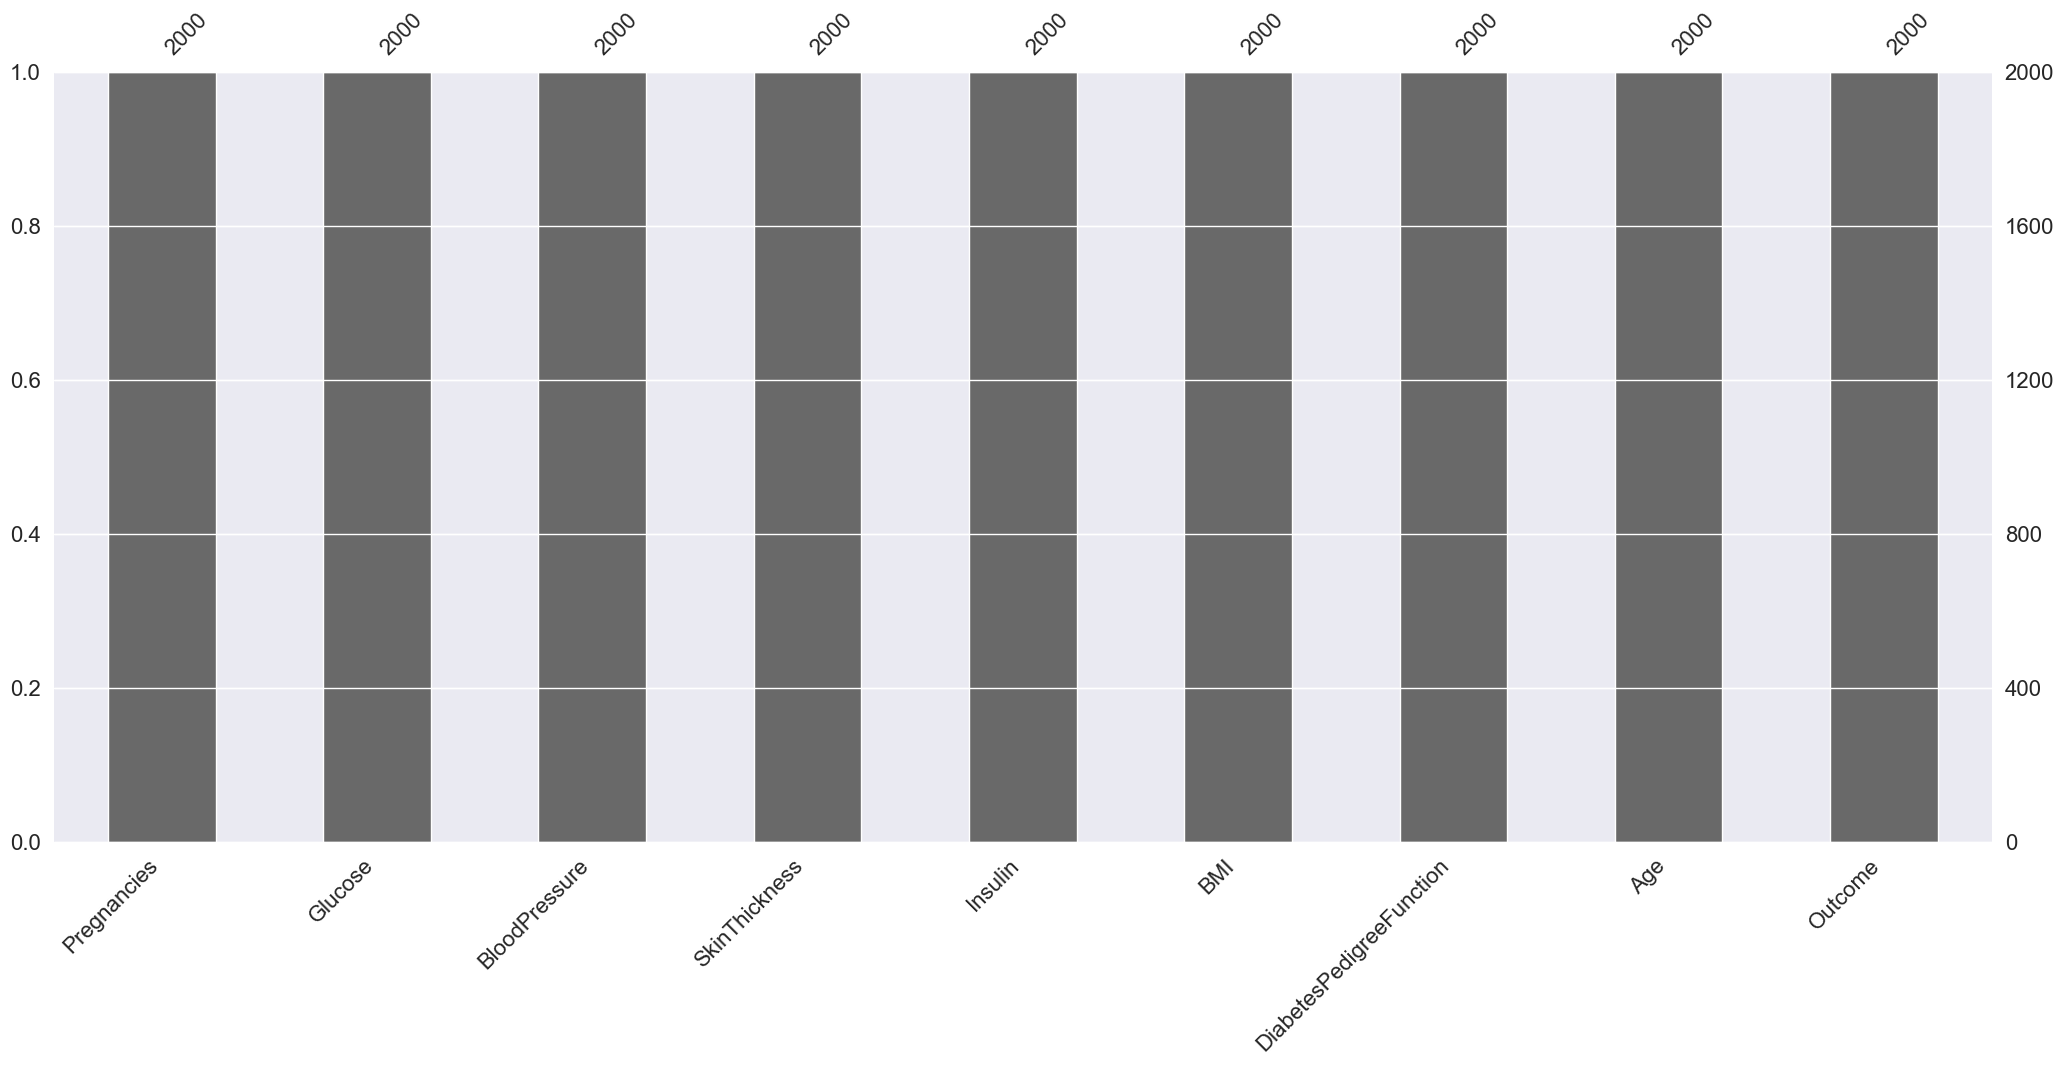

In [18]:
## null count analysis
!pip install missingno

import missingno as msno
p=msno.bar(diabetes_data)

Outcome
0    1316
1     684
Name: count, dtype: int64


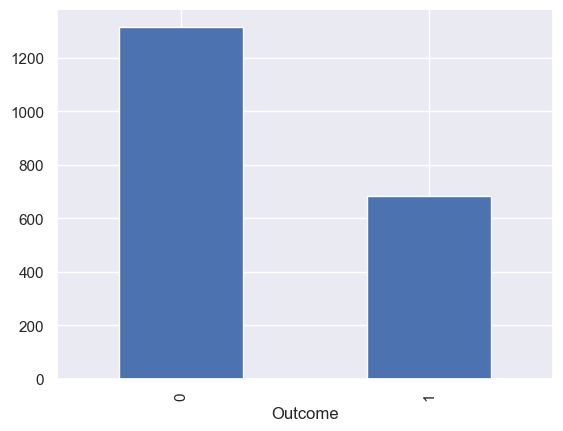

In [19]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

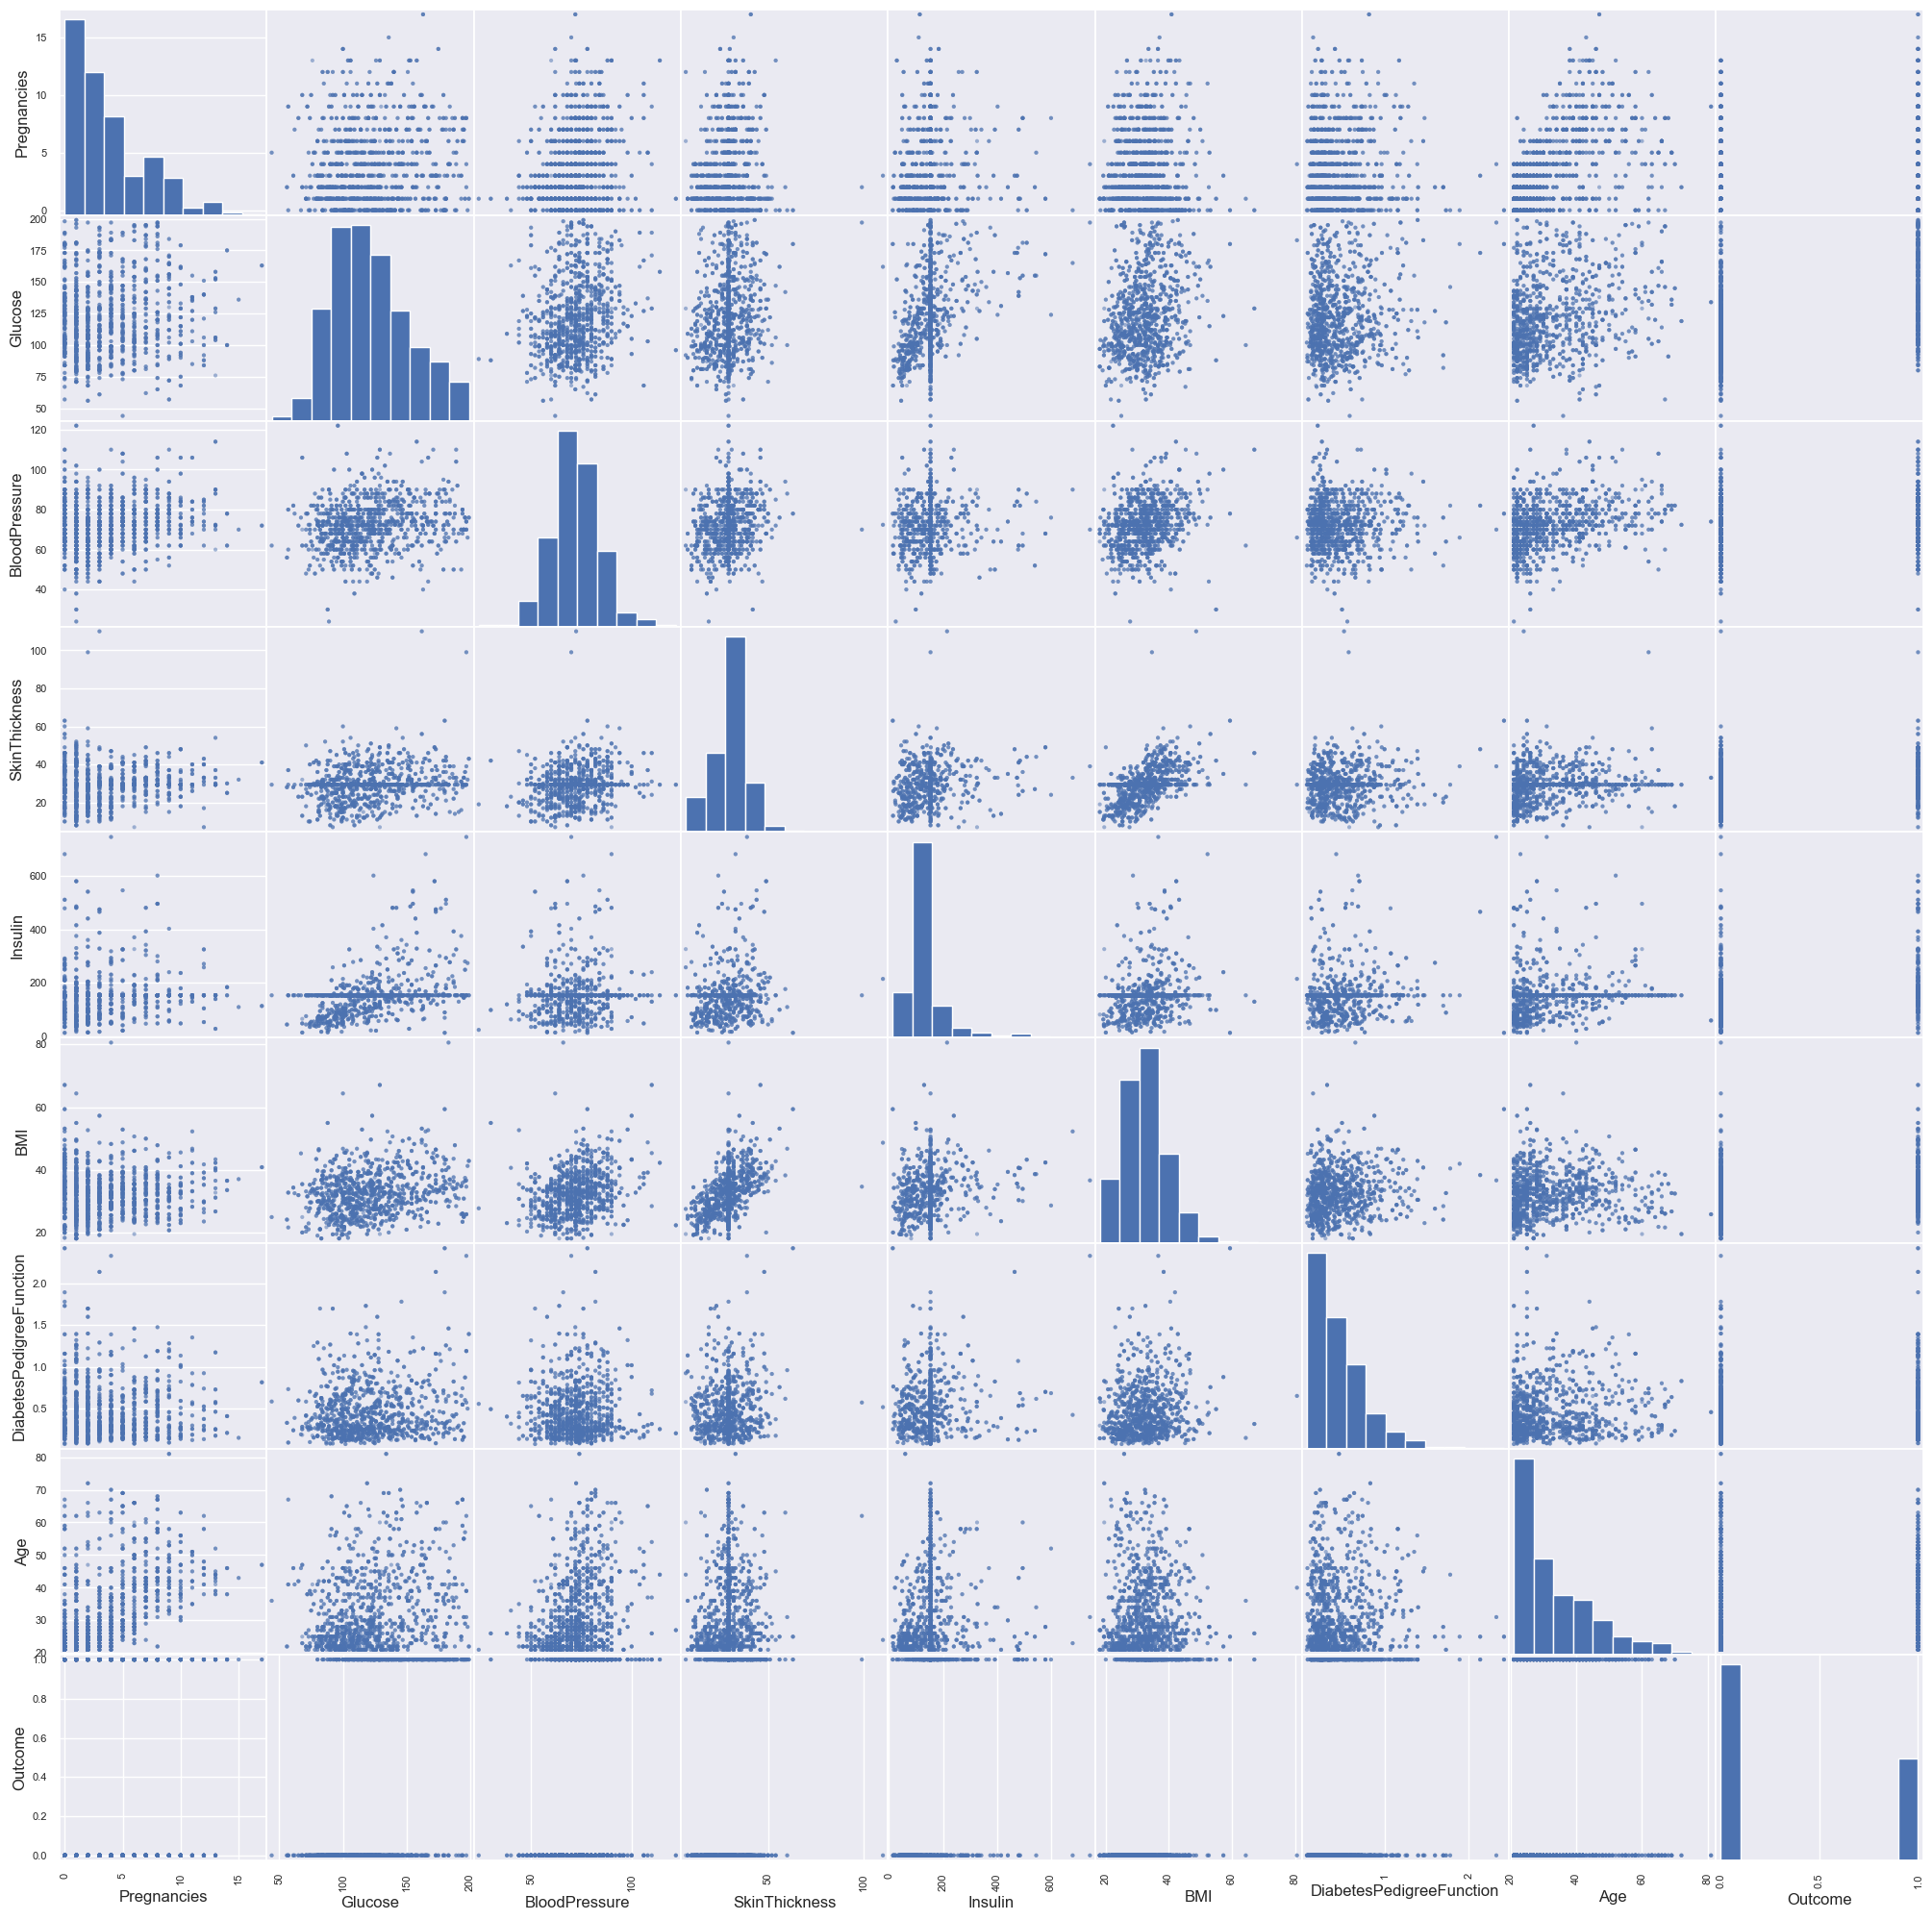

In [20]:
!pip install --upgrade pandas
!pip install --upgrade pandas
from pandas.plotting import scatter_matrix
# Assuming 'diabetes_data' is a pandas DataFrame already defined in your code:
p = scatter_matrix(diabetes_data, figsize=(25, 25))


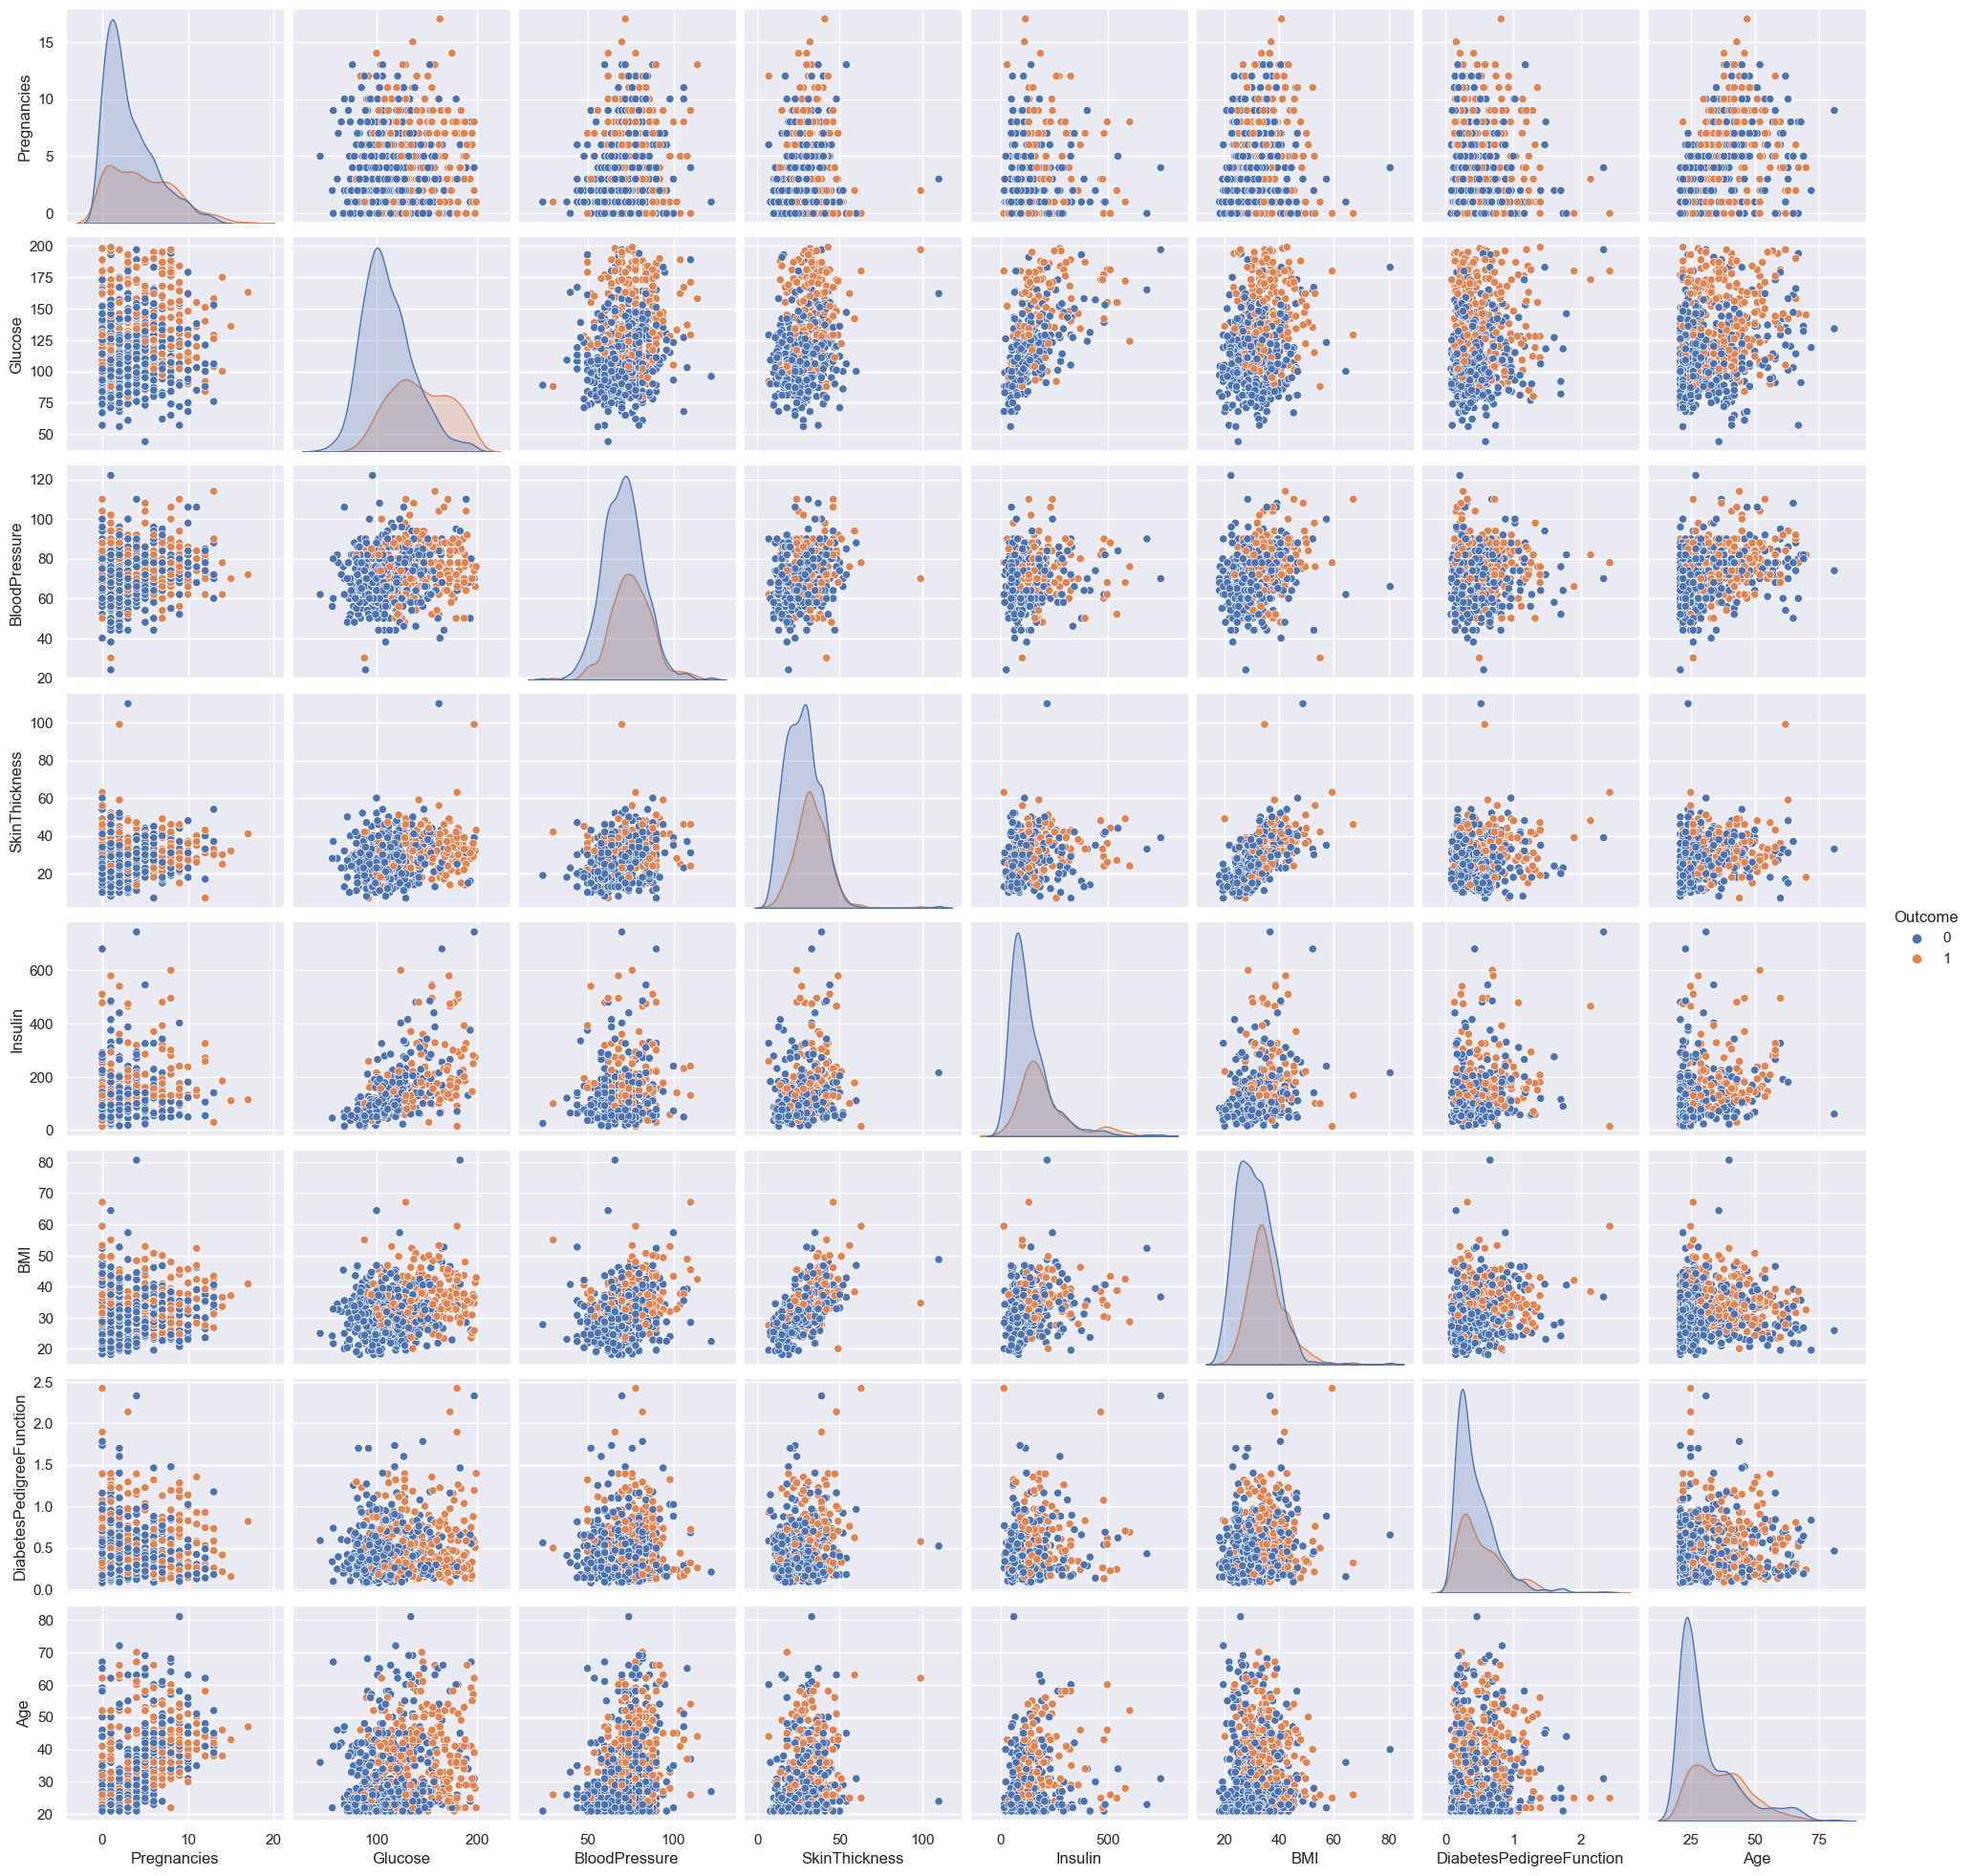

In [21]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

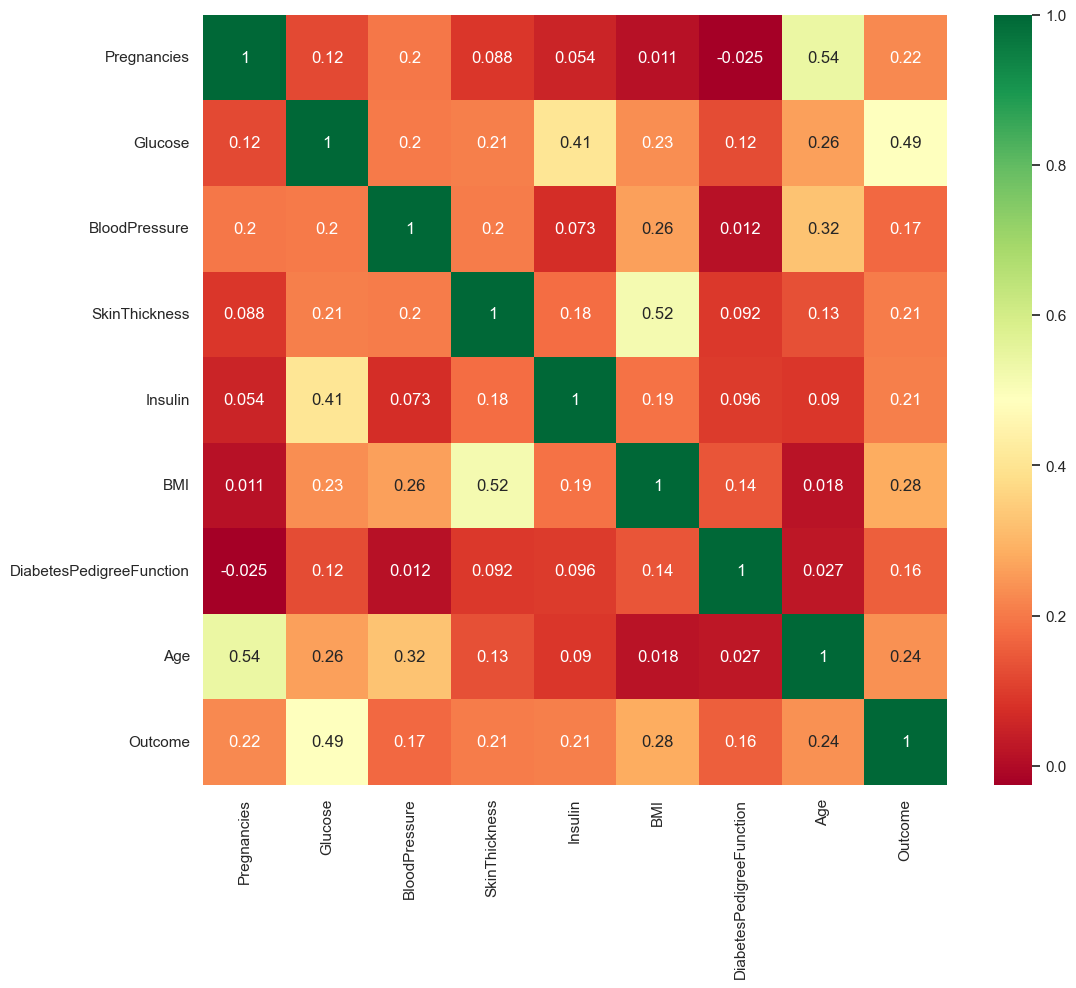

In [22]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap2

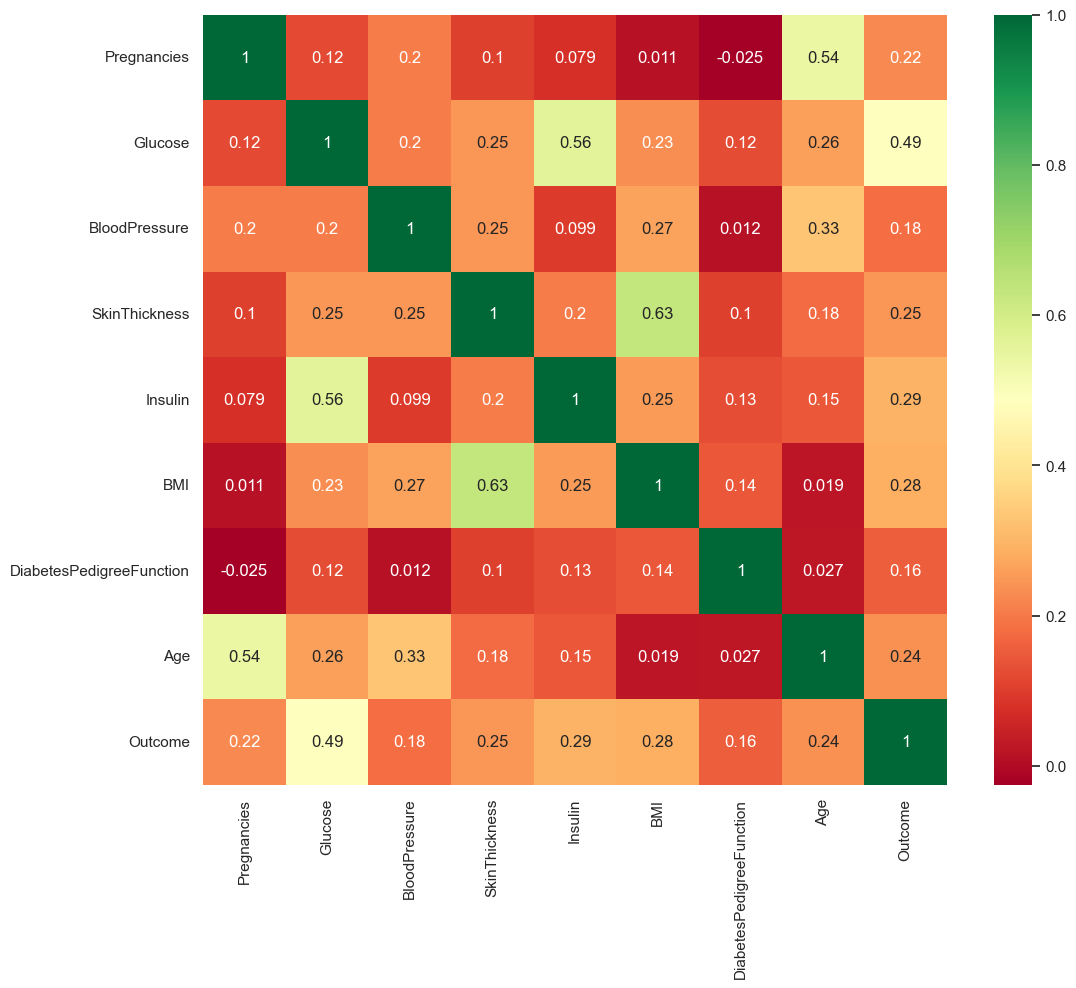

In [23]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Refining Data Preprocessing
Based on our initial analysis and visualization, we now refine our preprocessing steps to ensure optimal model performance. This includes handling outliers, selecting key features, and addressing any data imbalance observed.


In [24]:
# Assuming 'Glucose' and 'BMI' are key features where outliers may impact model performance
# This is a simple method using IQR to filter out extreme outliers
Q1 = diabetes_data['Glucose'].quantile(0.25)
Q3 = diabetes_data['Glucose'].quantile(0.75)
IQR = Q3 - Q1
data_filtered = diabetes_data[~((diabetes_data['Glucose'] < (Q1 - 1.5 * IQR)) | (diabetes_data['Glucose'] > (Q3 + 1.5 * IQR)))]

Q1 = data_filtered['BMI'].quantile(0.25)
Q3 = data_filtered['BMI'].quantile(0.75)
IQR = Q3 - Q1
data_filtered = data_filtered[~((data_filtered['BMI'] < (Q1 - 1.5 * IQR)) | (data_filtered['BMI'] > (Q3 + 1.5 * IQR)))]


## Model Training with K-Nearest Neighbors
With our data preprocessed, we now proceed to train the K-Nearest Neighbors model. We will also explore different values of `k` to find the optimal number of neighbors for our prediction model.


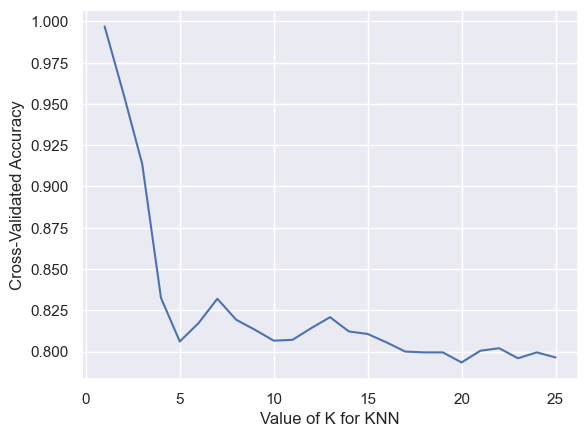

In [25]:
from sklearn.model_selection import cross_val_score

# Separating the dataset into features and target variable after preprocessing
X = data_filtered.drop('Outcome', axis=1)
y = data_filtered['Outcome']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal k value
k_range = range(1, 26)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


## Model Evaluation
After training our model, we evaluate its performance using several metrics to understand its accuracy, precision, recall, and to examine the confusion matrix.


In [26]:
# Assuming the optimal k value was found to be 5
k_optimal = 5
knn_optimal = KNeighborsClassifier(n_neighbors=k_optimal)
knn_optimal.fit(X_scaled, y)

# Predicting on the scaled features
y_pred = knn_optimal.predict(X_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Accuracy Score:", accuracy_score(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1305
           1       0.88      0.90      0.89       665

    accuracy                           0.93      1970
   macro avg       0.92      0.92      0.92      1970
weighted avg       0.93      0.93      0.93      1970

Confusion Matrix:
 [[1225   80]
 [  66  599]]
Accuracy Score: 0.9258883248730965


## Documentation and Reporting
In this final section, we summarize our findings, discuss the model's performance, and outline potential areas for further research or improvement.


In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [28]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.515394  0.523251      -0.851032       0.524029       NaN  0.131216   
1    -1.120495 -1.240004       0.784991       0.153607 -0.258436  0.766646   
2    -1.120495  0.751821            NaN            NaN       NaN  1.595468   
3    -1.120495  0.425293      -0.360225       1.172268  0.865460  1.333008   
4    -0.817945  0.555904      -0.851032       1.079662  2.933427  1.111989   

   DiabetesPedigreeFunction       Age  
0                 -1.063246  1.180424  
1                 -0.735551 -0.856326  
2                  0.491759 -0.177409  
3                 -0.327478 -0.771462  
4                  0.201161 -1.026055

In [29]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [30]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the SVM Model

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel

# Train the model on the scaled training dataset
svm_model.fit(X_train_scaled, y_train)

# Predict the outcomes on the scaled test dataset
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
print("Accuracy of SVM Model:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy of SVM Model: 0.7841079460269865
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       439
           1       0.73      0.59      0.65       228

    accuracy                           0.78       667
   macro avg       0.77      0.74      0.75       667
weighted avg       0.78      0.78      0.78       667



# Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier()

# Train the model on the training dataset (no need to scale data for Gradient Boosting)
gbc_model.fit(X_train, y_train)

# Predict the outcomes on the test dataset
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy of Gradient Boosting Classifier Model:", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))


Accuracy of Gradient Boosting Classifier Model: 0.8785607196401799
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       439
           1       0.86      0.77      0.81       228

    accuracy                           0.88       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.88      0.88      0.88       667



In [34]:
import joblib
knn.fit(X, y)
joblib.dump(knn, 'knn_cv_model.pkl')


['knn_cv_model.pkl']

# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))


Naive Bayes Accuracy: 0.7796101949025487
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       439
           1       0.69      0.64      0.67       228

    accuracy                           0.78       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.78      0.78      0.78       667



# XGBoost

In [36]:
!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9550224887556222
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       439
           1       0.93      0.94      0.93       228

    accuracy                           0.96       667
   macro avg       0.95      0.95      0.95       667
weighted avg       0.96      0.96      0.96       667



## Decision Tree Model
Decision Trees are a non-linear predictive model that recursively splits the data into subsets based on the value of input features. They are easy to interpret and can handle both numerical and categorical data.


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 0.967016491754123


## Random Forest Model
Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. It is an ensemble method that improves on the simplicity of decision trees by reducing their tendency to overfit.


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9715142428785607


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Note: Logistic Regression can benefit from scaled features
log_reg = LogisticRegression(random_state=42)

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Calculate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Logistic Regression Accuracy: 0.7916041979010495


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8065967016491754
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       439
           1       0.73      0.69      0.71       228

    accuracy                           0.81       667
   macro avg       0.79      0.78      0.78       667
weighted avg       0.80      0.81      0.81       667



In [43]:

        
        
        # Assuming accuracies have been calculated
accuracies = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gbc),
    "Naive Bayes": accuracy_score(y_test, y_pred_gnb),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
     "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}

# Convert accuracies to a list of dictionaries for DataFrame
accuracy_list = [{"Model": model, "Accuracy": acc} for model, acc in accuracies.items()]

In [44]:
import pandas as pd

# Create a DataFrame
df_acc = pd.DataFrame(accuracy_list)

# Finding the minimum and maximum accuracy for highlighting
min_acc = df_acc['Accuracy'].min()
max_acc = df_acc['Accuracy'].max()

# Function to apply highlighting
def highlight_min_max(s):
    if s.Accuracy == min_acc:
        return ['background-color: yellow']*2
    elif s.Accuracy == max_acc:
        return ['background-color: lightgreen']*2
    return ['']*2

# Displaying the DataFrame with highlighted Min and Max accuracy
df_styled = df_acc.style.apply(highlight_min_max, axis=1)
df_styled 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import joblib

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with the parameters that yielded the best accuracy
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Save the trained model as a .pkl file
model_filename = 'best_rf_model.pkl'
joblib.dump(rf_model, model_filename)

# After running this code, 'best_rf_model.pkl' will be created in your current directory.


['best_rf_model.pkl']

In [46]:
# We can find out the version of scikit-learn installed in the Jupyter notebook environment by using the following command.
import sklearn

# Getting the version
sklearn_version = sklearn.__version__
sklearn_version


'1.3.0'

In [48]:
# To find out the version of Python used in a Jupyter Notebook, you can simply import the sys module
# and print out the version information.
import sys

# Getting the version
python_version = sys.version
python_version


'3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]'